# Трансформации распределений признаков

✍ Теперь, когда мы вспомнили популярные методы масштабирования, давайте перейдём к другим способам преобразования распределения и скейлинга признаков, доступных в мощной библиотеке sklearn.

## Quantile Transformer

Этот [метод](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

> **Квантильное преобразование** сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

> **Квантильная функция**, также называемая **функцией процентной точки (PPF)**, является обратной функцией кумулятивного распределения вероятностей (CDF).

> **CDF** — это функция, которая возвращает вероятность значения, равного или меньше заданного значения.

*PPF является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.*

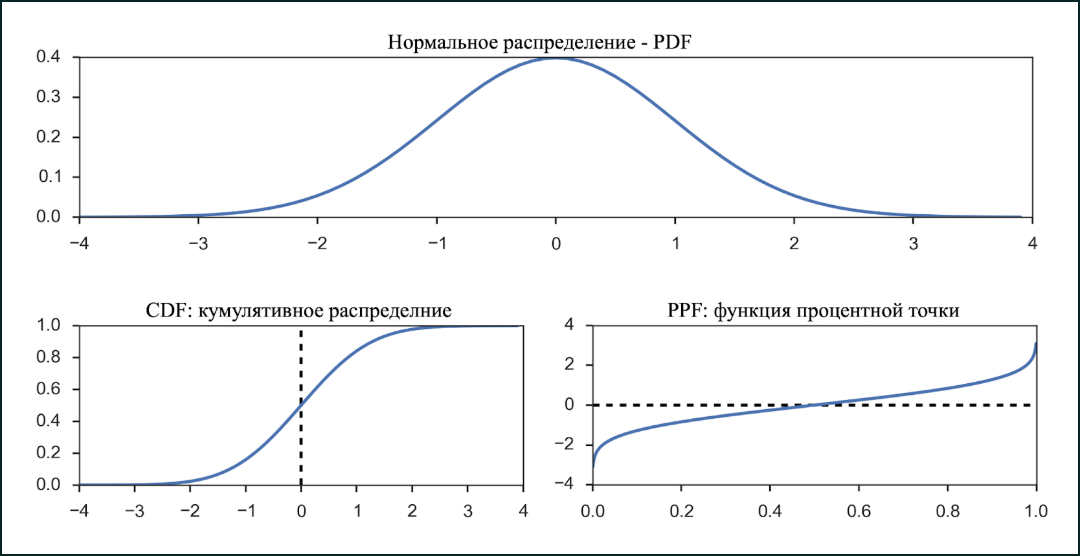

Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

Это квантильное преобразование доступно в библиотеке машинного обучения Python scikit-learn через класс [QuantileTransformer.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

У класса есть аргумент output_distribution, который отвечает за тип выходного распределения. Он может принимать значение 'uniform' (равномерное распределение) или 'normal' (нормальное распределение). По умолчанию используется равномерное распределение, то есть значение параметра равно 'uniform'.

Гиперпараметр n_quantiles определяет разрешение отображения или ранжирование наблюдений в наборе данных. Это значение должно быть меньше, чем количество наблюдений в наборе данных, и по умолчанию равно 1000.

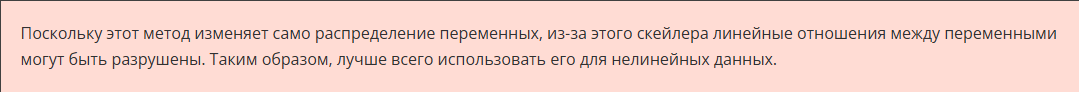

Применим данное преобразование к признаку year. Для начала посмотрим на его распределение.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx') 

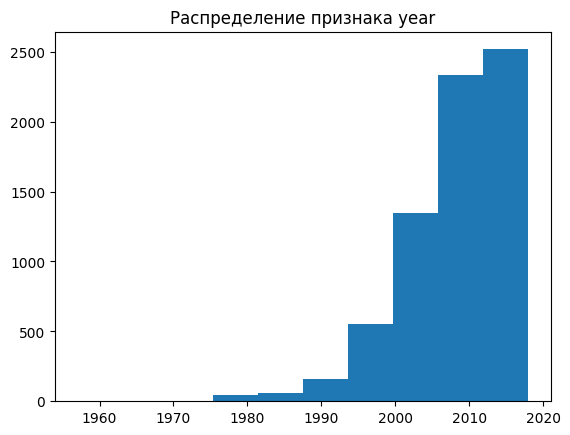

In [3]:
import matplotlib.pyplot as plt
 
plt.hist(data.year)
plt.title('Распределение признака year');

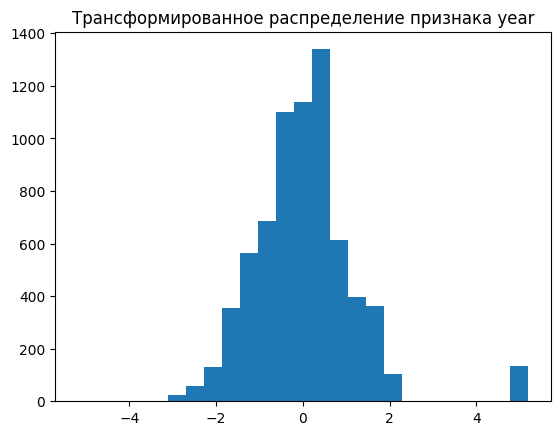

In [4]:
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

### Задание 6.1

Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ **округлите до второго знака после точки-разделителя.**

<Axes: >

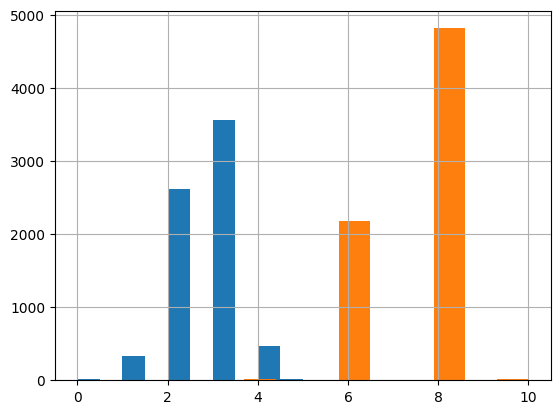

In [5]:
data['condition'].hist()
data['cylinders'].hist()

In [6]:
quantile = QuantileTransformer(output_distribution='uniform')
data_for_transform = data[['condition', 'cylinders']].values.reshape((len(data),2))
data_transformed = quantile.fit_transform(data_for_transform)

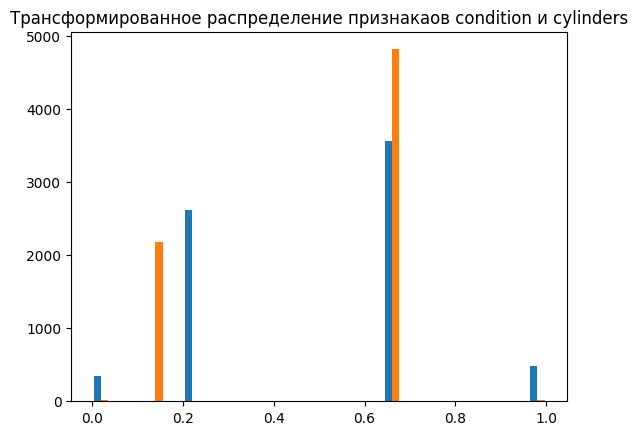

In [7]:
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признакаов condition и cylinders')
plt.show()

In [8]:
round(data_transformed[0][0],2)

np.float64(0.96)

## Log Transform

**Логарифмическое преобразование** — один из самых популярных методов преобразования. В основном оно используется для превращения асимметричного распределения в нормальное/менее асимметричное. В этом преобразовании мы берём логарифм значений признака вместо самих значений.

Почему это работает? Потому, что функция логарифма создана для работы с большими числами.

### Задание 6.2

Вспомните, чему равны логарифмы следующих значений:

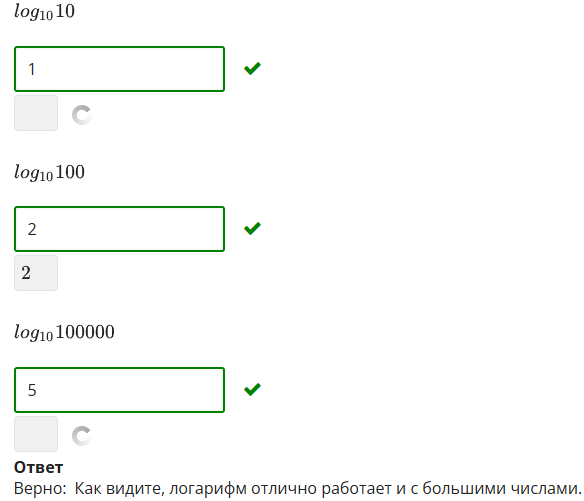

Посмотрим на распределение признака price. Оно асимметрично, причём значения варьируются от 0 до ~300000.

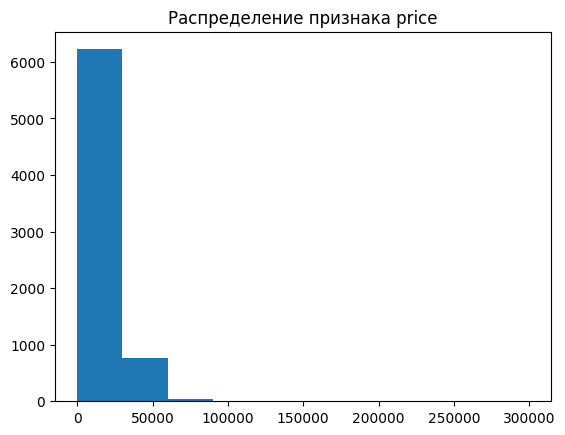

In [9]:
plt.hist(data.price)
plt.title('Распределение признака price');

Идеальный кандидат для логарифмического преобразования — применим его. На этот раз обойдёмся силами *numpy.*

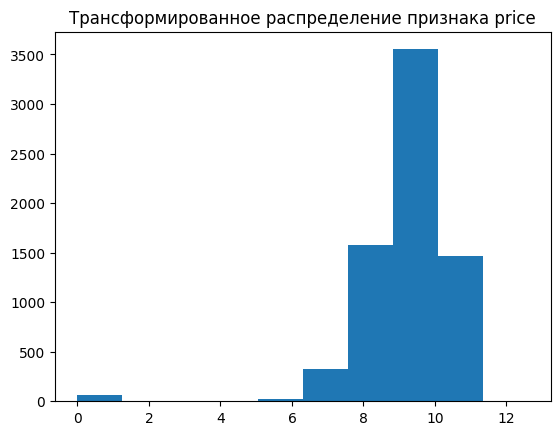

In [10]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Давайте также сравним значения исходного и трансформированного признака.

In [11]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


Теперь вместо экстремального разброса значений в 1 и 299500 мы получили 0 и 12.6. Таким образом, логарифмическое преобразование сыграло роль в уменьшении влияния слишком низких и слишком высоких значений.

> Стоит учесть, что, если наши данные имеют отрицательные значения или значения в диапазоне от 0 до 1, мы не можем применить логарифмическое преобразование напрямую, поскольку логарифм отрицательных чисел и 0 не определён, то есть мы получим ошибки или значения *NaN* в наших данных. В таких случаях мы можем добавить число к этим значениям, чтобы все они были больше 1.

### Задание 6.3

Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.

In [12]:
round(price_data['transformed_price'].iloc[-1], 1)

np.float64(9.8)

## Power Transformer Scaler

Как и другие скейлеры, с которыми вы уже познакомились, Power Transformer также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. *Power Transformer* фактически автоматизирует принятие этого решения, вводя параметр, называемый *lambda*. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение *lambda* и используя один из следующих параметрических методов:

- **Преобразование Бокса-Кокса**, которое работает для положительных значений признака.
- **Преобразование Йео-Джонсона**, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.

В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [13]:
data[data['year'].isna() == True]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather


In [14]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Предположим, что data — это DataFrame с колонками 'price' и 'year'
# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

# Преобразование с помощью PowerTransformer
box_cox = PowerTransformer(method='box-cox')
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)

# Создадим DataFrame с преобразованными данными
data_box_cox = pd.DataFrame(data_box_cox, columns=['transformed_price', 'transformed_year'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 123.77792357708721, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\User\AppData\Local\Progra

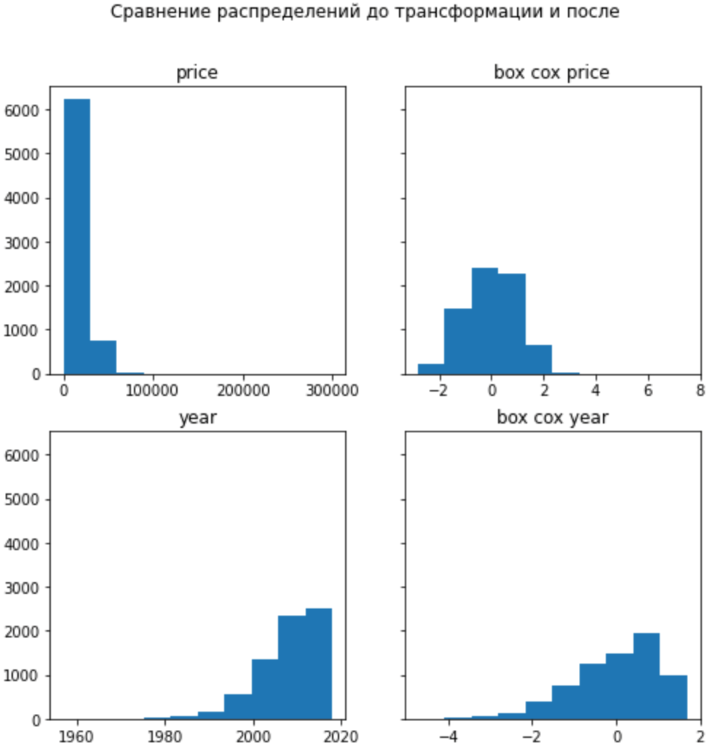

## Преобразование Бокса-Кокса

> В версии Python 3.12 box-cox не работает на переменной *year* **в качестве альтернативы искользуем 'yeo-johnson'**

In [16]:
box_cox = PowerTransformer(method = 'yeo-johnson')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


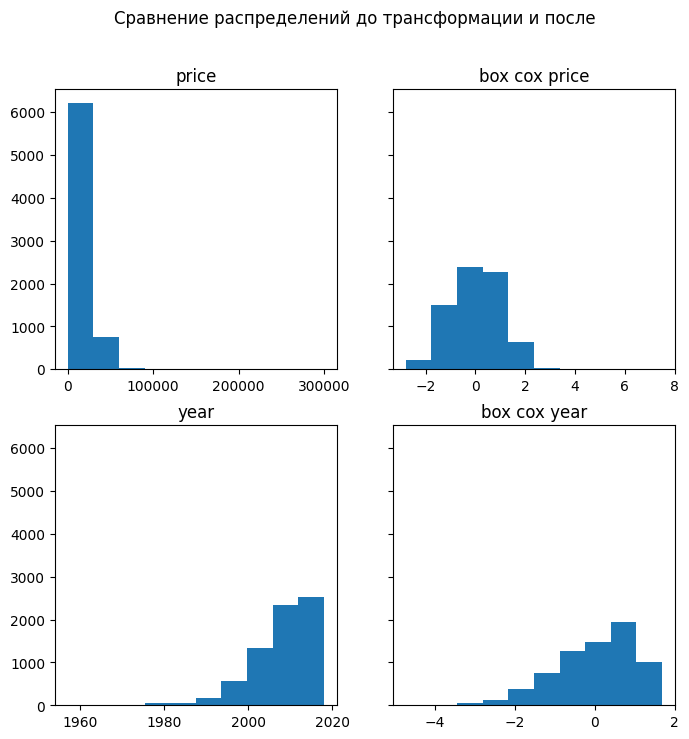

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()

### Задание 6.4

Выберите верное утверждение о методах трансформации:

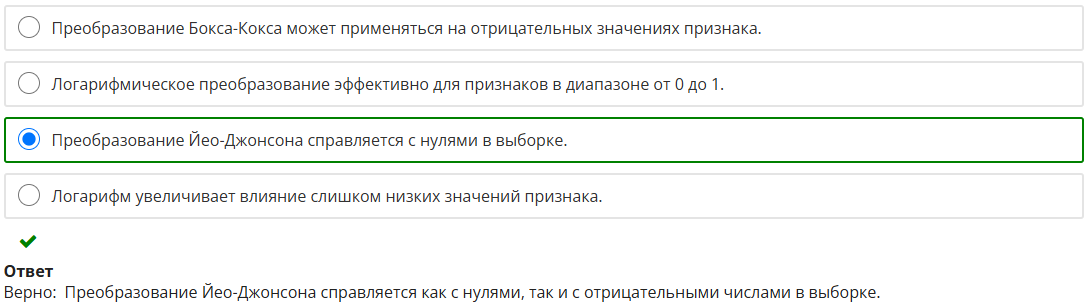